In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys

In [2]:
import dowhy
from dowhy import CausalModel

In [3]:
import pygraphviz

In [9]:
dataset = pd.read_csv('./data/processed/full_data.csv')

In [12]:
dataset['MainBranch']

0        I am a developer by profession
1        I am a developer by profession
2        I am a developer by profession
3        I am a developer by profession
4        I am a developer by profession
                      ...              
40710    I am a developer by profession
40711    I am a developer by profession
40712    I am a developer by profession
40713    I am a developer by profession
40714    I am a developer by profession
Name: MainBranch, Length: 40715, dtype: object

In [11]:
dataset.columns

Index(['MainBranch', 'Employment', 'Country', 'EdLevel', 'YearsCode',
       'YearsCodePro', 'OrgSize', 'Currency', 'OpSys', 'SOVisitFreq',
       'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms', 'Gender',
       'Ethnicity', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'LearnCode_School',
       'LearnCode_Other online resources (ex: videos, blogs, etc)',
       'LearnCode_Books / Physical media', 'DevType_Developer, full-stack',
       'DevType_Developer, back-end', 'DevType_Developer, front-end',
       'LanguageHaveWorkedWith_JavaScript', 'LanguageHaveWorkedWith_HTML/CSS',
       'LanguageHaveWorkedWith_SQL', 'DatabaseHaveWorkedWith_PostgreSQL',
       'DatabaseHaveWorkedWith_MySQL',
       'DatabaseHaveWorkedWith_Microsoft SQL Server',
       'PlatformHaveWorkedWith_AWS', 'PlatformHaveWorkedWith_Microsoft Azure',
       'PlatformHaveWorkedWith_Google Cloud Platform',
       'WebframeHaveWorkedWith_React.js', 'WebframeHaveWorkedWith_jQuery',
       'WebframeHave

In [10]:
dataset.head()

,MainBranch,Employment,Country,EdLevel,YearsCode,YearsCodePro,OrgSize,Currency,OpSys,SOVisitFreq,...,NEWCollabToolsHaveWorkedWith_Visual Studio,NEWCollabToolsHaveWorkedWith_Notepad++,NEWStuck_Google it,NEWStuck_Visit Stack Overflow,NEWStuck_Do other work and come back later,NEWSOSites_Stack Overflow,NEWSOSites_Stack Exchange,NEWSOSites_Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies),Age,Age1stCode
0,I am a developer by profession,Employed full-time,Other,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,4,Other,Other,Linux-based,Multiple times per day,...,True,False,True,True,False,True,True,False,29.5,14.0
1,I am a developer by profession,Employed full-time,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,5,Other,EUR European Euro,Linux-based,Daily or almost daily,...,False,False,True,True,True,True,True,False,29.5,14.0
2,I am a developer by profession,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,6,"1,000 to 4,999 employees",EUR European Euro,Linux-based,Multiple times per day,...,False,False,True,True,False,True,False,False,29.5,14.0
3,I am a developer by profession,Employed full-time,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,100 to 499 employees,Other,Windows,Multiple times per day,...,True,False,False,False,False,True,False,False,29.5,7.5
4,I am a developer by profession,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,6,Other,CAD\tCanadian dollar,MacOS,Multiple times per day,...,True,False,True,True,False,True,True,False,29.5,14.0


In [38]:
dataset['high_salary'] = (dataset['ConvertedCompYearly'] > dataset['ConvertedCompYearly'].median()).astype(int)
dataset.drop('ConvertedCompYearly', axis=1, inplace=True)

In [39]:
# Setting a causal graph
causal_graph = """digraph {
high_salary;
U[label="Unobserved Confounders"];
MainBranch;
Employment;
Country;
EdLevel;
YearsCode;
YearsCodePro;
OrgSize;
Currency;
OpSys;
SOVisitFreq;
YearsCode->high_salary;
Employment->YearsCode;
Country->high_salary;
U->YearsCode; U->Employment;U->high_salary;
}"""

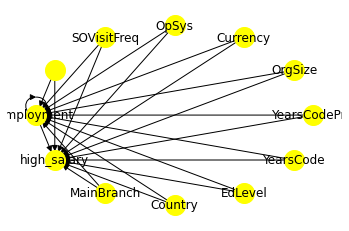

In [42]:
common_causes = ['MainBranch', 'Employment', 'Country', 'EdLevel', 'YearsCode', 'YearsCodePro',
                 'OrgSize', 'Currency', 'OpSys', 'SOVisitFreq', '']

model=CausalModel(
        data = dataset,
        treatment='Employment',
        outcome='high_salary',
        common_causes=common_causes)

model.view_model()

In [43]:
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(high_salary|SOVisitFreq,EdLevel,OrgSize,YearsCodePro
d[Employment]                                                                 

                                              
,OpSys,MainBranch,Currency,YearsCode,Country))
                                              
Estimand assumption 1, Unconfoundedness: If U→{Employment} and U→high_salary then P(high_salary|Employment,SOVisitFreq,EdLevel,OrgSize,YearsCodePro,OpSys,MainBranch,Currency,YearsCode,Country,U) = P(high_salary|Employment,SOVisitFreq,EdLevel,OrgSize,YearsCodePro,OpSys,MainBranch,Currency,YearsCode,Country)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [44]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification",
                                 target_units="ate")
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

Exception: Propensity score methods are applicable only for binary treatments

In [ ]:
model=CausalModel(
        data = dataset,
        treatment='different_room_assigned',
        outcome='is_canceled',
        common_causes=xs.split('+')
        )

model.view_model()